### Business Problem
Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.

### Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# EDA (Each data set)
## The Numbers *

In [88]:
tn = pd.read_csv('tn.movie_budgets.csv')
tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [89]:
#tn['domestic_gross'] = pd.to_numeric(tn['domestic_gross'])
#tn['domestic_gross'] = tn['domestic_gross'].astype(str).astype(int)
tn[tn.columns[3:]] = (tn[tn.columns[3:]].replace('[\$,]', '', regex=True).astype(float))/1000000
#tn.info()

In [90]:
tn['roi'] = (tn.worldwide_gross - tn.production_budget)/tn.production_budget
tn.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,-0.572108


In [91]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
q = """SELECT movie, release_date, worldwide_gross
     FROM tn
     ORDER BY worldwide_gross DESC
     LIMIT 10;"""

movies = pysqldf(q)
movies

,movie,release_date,worldwide_gross
0,Avatar,"Dec 18, 2009",2776.345279
1,Titanic,"Dec 19, 1997",2208.208395
2,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",2053.311220
3,Avengers: Infinity War,"Apr 27, 2018",2048.134200
4,Jurassic World,"Jun 12, 2015",1648.854864
5,Furious 7,"Apr 3, 2015",1518.722794
6,The Avengers,"May 4, 2012",1517.935897
7,Avengers: Age of Ultron,"May 1, 2015",1403.013963
8,Black Panther,"Feb 16, 2018",1348.258224
9,Harry Potter and the Deathly Hallows: Part II,"Jul 15, 2011",1341.693157


## IMBD (SQL) *

In [92]:
import sqlite3 
conn = sqlite3.connect('im.db')
q= """
SELECT original_title AS movie, start_year, genres
FROM movie_basics
"""
im = pd.read_sql(q, conn)
im.head()

,movie,start_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [10]:
#im[im['genres']] = (im['genres']).astype(str)

In [93]:
im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie       146123 non-null  object
 1   start_year  146144 non-null  int64 
 2   genres      140736 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


In [12]:
#pd.read_sql("""
#SELECT *
#FROM movie_basics
#WHERE original_title LIKE '%Avatar%'
#""", conn)

# Merging IMBD with The Numbers

In [94]:
df_combine_genres = pd.merge(tn, im, how = 'inner')
#df_combine_genres.head()
#df_combine_genres.info()

In [95]:
df_combine_genres.sort_values(['worldwide_gross'], ascending=[False], inplace= True)
#df_combine_genres.set_index('genres',  inplace= True)
df_combine_genres.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,start_year,genres
41,43,"Dec 19, 1997",Titanic,200.0,659.363944,2208.208395,10.041042,2012,Adventure
42,43,"Dec 19, 1997",Titanic,200.0,659.363944,2208.208395,10.041042,2018,Family
3,7,"Apr 27, 2018",Avengers: Infinity War,300.0,678.815482,2048.134200,5.827114,2018,"Action,Adventure,Sci-Fi"
24,34,"Jun 12, 2015",Jurassic World,215.0,652.270625,1648.854864,6.669092,2015,"Action,Adventure,Sci-Fi"
18,27,"May 4, 2012",The Avengers,225.0,623.279547,1517.935897,5.746382,2012,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963,3.243841,2015,"Action,Adventure,Sci-Fi"
40,42,"Feb 16, 2018",Black Panther,200.0,700.059566,1348.258224,5.741291,2018,"Action,Adventure,Sci-Fi"
110,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170.0,417.719760,1305.772799,6.681016,2018,"Action,Adventure,Sci-Fi"
147,56,"Nov 22, 2013",Frozen,150.0,400.738009,1272.469910,7.483133,2010,"Adventure,Drama,Sport"
148,56,"Nov 22, 2013",Frozen,150.0,400.738009,1272.469910,7.483133,2013,"Adventure,Animation,Comedy"


In [10]:
#df = df.set_index([pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'])])
#sg=[]
#sg=df_combine_genres['worldwide_gross'].loc[['Sci-Fi']].sum() #sum of every movie that is at least Sci-fi
#sg

In [97]:
genres=['Action', 'Adventure', 'Fantasy', 'Drama', 'Sci-Fi', 'Comedy', 'Sport', 'Crime', 'Thriller', 'Musical', 'Family', 'Animation', 'Biography', 'Documentary', 'History', 'Horror', 'Mystery', 'Romance', 'Music', 'Western']

In [98]:
#df_combine_genres.str.contains('Sci-Fi', case=True)
#'Sci-Fi' in df_combine_genres.index

wwg_avg=[] #Worldwide gross Average profits.
for i in range(len(genres)):
    wwg = df_combine_genres['genres'].astype(str).str.contains(genres[i], regex = True, na = False)
    wwg_avg.append(df_combine_genres['worldwide_gross'][wwg].mean())
#wwg_avg

dg_avg=[] #Domestic gross Average profits.
for i in range(len(genres)):
    dg = df_combine_genres['genres'].astype(str).str.contains(genres[i], regex = True, na = False)
    dg_avg.append(df_combine_genres['domestic_gross'][dg].mean())
#dg_avg

pb_avg=[] #production_budget Average profits.
for i in range(len(genres)):
    pb = df_combine_genres['genres'].astype(str).str.contains(genres[i], regex = True, na = False)
    pb_avg.append(df_combine_genres['production_budget'][pb].mean())
#print(pb_avg)

wwg_sum=[] #Worldwide gross sum profits.
for i in range(len(genres)):
    Gsum = df_combine_genres['genres'].astype(str).str.contains(genres[i], regex = True, na = False)
    wwg_sum.append(df_combine_genres['worldwide_gross'][Gsum].sum())
#wwg_sum

roi_avg=[] #production_budget Average profits.
for i in range(len(genres)):
    roi = df_combine_genres['genres'].astype(str).str.contains(genres[i], regex = True, na = False)
    roi_avg.append(df_combine_genres['roi'][roi].mean())
#print(roi_avg)

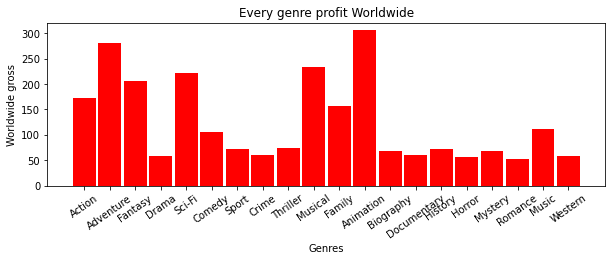

In [99]:
import seaborn as sns
#sns.barplot(x=genres,y=Gsums)
#sns.histplot(df_combine_genres, kde=True)

fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(genres, wwg_avg, color = 'red',width = 0.9)
 
plt.xlabel("Genres")
plt.xticks(rotation = 35)
plt.ylabel("Worldwide gross")
plt.title("Every genre profit Worldwide")
plt.show()

### My conclusions:

-

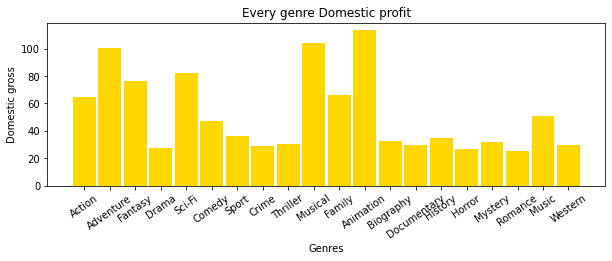

In [100]:
fig = plt.figure(figsize = (10, 3))
plt.bar(genres, dg_avg, color='gold' ,width = 0.9)
 
plt.xlabel("Genres")
plt.xticks(rotation = 35)
plt.ylabel("Domestic gross")
plt.title("Every genre Domestic profit")
plt.show()

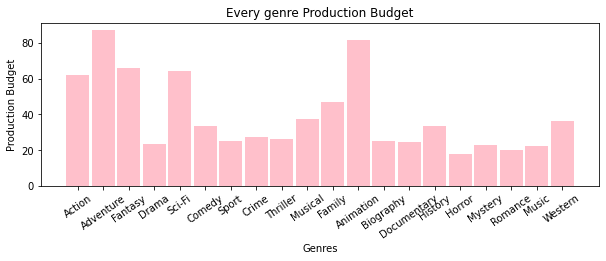

In [101]:
fig = plt.figure(figsize = (10, 3))
plt.bar(genres, pb_avg, color='pink' ,width = 0.9)
 
plt.xlabel("Genres")
plt.xticks(rotation = 35)
plt.ylabel("Production Budget")
plt.title("Every genre Production Budget")
plt.show()

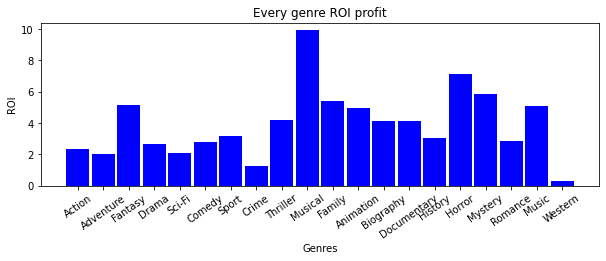

In [102]:
fig = plt.figure(figsize = (10, 3))
plt.bar(genres, roi_avg, color='blue' ,width = 0.9)
 
plt.xlabel("Genres")
plt.xticks(rotation = 35)
plt.ylabel("ROI")
plt.title("Every genre ROI profit")
plt.show()

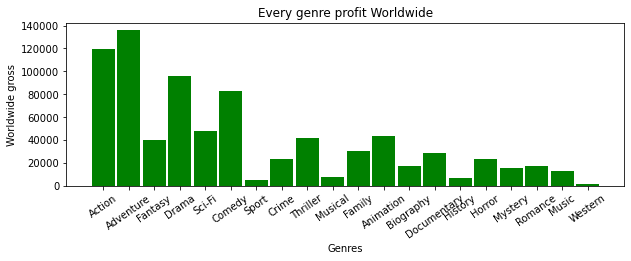

In [103]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(genres, wwg_sum, color = 'green', width = 0.9)
 
plt.xlabel("Genres")
plt.xticks(rotation = 35)
plt.ylabel("Worldwide gross")
plt.title("Every genre profit Worldwide")
plt.show()

In [104]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

q = """SELECT movie, worldwide_gross, genres
     FROM df_combine_genres
     WHERE genres LIKE '%Sci-Fi%'
     ;"""
gen = pysqldf(q)
gen

,movie,worldwide_gross,genres
0,Avengers: Infinity War,2048.134200,"Action,Adventure,Sci-Fi"
1,Jurassic World,1648.854864,"Action,Adventure,Sci-Fi"
2,The Avengers,1517.935897,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,1403.013963,"Action,Adventure,Sci-Fi"
4,Black Panther,1348.258224,"Action,Adventure,Sci-Fi"
...,...,...,...
211,The Dead Undead,0.000000,"Action,Horror,Sci-Fi"
212,Vessel,0.000000,Sci-Fi
213,Infected,0.000000,"Action,Horror,Sci-Fi"
214,Mutant World,0.000000,Sci-Fi


In [105]:
from pandasql import sqldf
pysqldf = lambda f: sqldf(f, globals())
f = """
     SELECT SUM(worldwide_gross) SciFi
     FROM df_combine_genres
     WHERE genres LIKE '%Sci-Fi%'
     ;"""

Ugen = pysqldf(f)
Ugen

,SciFi
0,47951.932641


## Find every type unique of genre

In [106]:
df_combine_genres['genres']
genre_list = df_combine_genres['genres'].tolist()
genre_list

['Adventure',
 'Family',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Adventure,Drama,Sport',
 'Adventure,Animation,Comedy',
 'Family,Fantasy,Musical',
 'Family,Fantasy,Musical',
 'Action,Adventure,Animation',
 'Action,Crime,Thriller',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Thriller',
 'Action,Adventure,Sci-Fi',
 'Action,Thriller',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Fantasy',
 'Adventure,Animation,Comedy',
 'Documentary',
 'Fantasy,Musical',
 'Adventure,Family,Fantasy',
 'Adventure,Animation,Comedy',
 'Adventure,Animation,Comedy',
 'Adventure,Family,Fantasy',
 'Adventure,Animation,Drama',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Comedy',
 'Animation',
 'Adventure,Drama,Family',
 'Adventure,Fantasy',
 'Adventure,Fantas

In [107]:
#genres=['Action', 'Adventure', 'Fantasy', 'Drama', 'Sci-Fi', 'Comedy', 'Sport', 'Crime', 'Thriller', 'Musical', 'Family', 'Animation', 'Biography', 'Documentary', 'History', 'Horror', 'Mystery', 'Romance', 'Music', 'Western']

In [108]:
df_genres = df_combine_genres[df_combine_genres['genres'].isin(['Action', 'Sci-Fi'])]
df_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,start_year,genres
145,55,"Jun 2, 2017",Wonder Woman,150.0,412.563408,821.133378,4.474223,2014,Sci-Fi
191,36,"Jun 29, 2005",War of the Worlds,132.0,234.280354,606.836535,3.597246,2013,Sci-Fi
490,37,"Jun 27, 2008",Wanted,75.0,134.508551,342.416460,3.565553,2010,Action
2325,56,"Dec 21, 2016",Dangal,9.5,12.391761,294.654618,30.016276,2013,Action
283,80,"Jun 1, 1990",Total Recall,65.0,119.394839,261.400000,3.021538,2010,Action
...,...,...,...,...,...,...,...,...,...
2101,86,"Jun 23, 2015",Crossroads,0.5,0.000000,0.000000,-1.000000,2014,Action
2541,91,"Feb 9, 2010",Icarus,6.0,0.000000,0.000000,-1.000000,2017,Sci-Fi
3276,71,"Jan 9, 2015",Vessel,0.8,0.000000,0.000000,-1.000000,2013,Sci-Fi
3133,17,"Sep 8, 2015",Checkmate,1.5,0.000000,0.000000,-1.000000,2016,Action


In [109]:
df_genres = df_combine_genres[df_combine_genres['genres'].df_combine_genres.str.contains('Sci-Fi')]
df_genres

AttributeError: 'Series' object has no attribute 'df_combine_genres'